# Integrating Google Sheets to an Esri SDE Feature Class
## Collaborative Data-Entry for non-GIS Users
***
> Jordan Carmona, GISP <br>
> City of McKinney, Texas <br>
> jcarmona@mckinneytexas.org <br>
> linkedin.com/in/jordancarmona

### Wrangling data from non-database sources manually?

- time-consuming
- frustrating
- untenable

### Google Sheets

$+$ Collaborative <br>
$+$ Real-Time <br>
$+$ Web-Based <br>

$-$ Cumbersome to Export <br>

### Esri SDE

$+$ Collaborative <br>
$+$ Real-Time <br>
$+$ Native GIS <br>

$-$ "Hard" to Script Against? <br>

### This presentation demonstrates: 
# <center> Google Sheet  &#8594;  Esri SDE

# <center> House-Keeping

## Necessary Libraries

In [1]:
import pandas as pd        #used for ingesting our Google Sheet
import numpy as np         #used for converting to an Esri Table
import arcpy               #used in the ArcGIS environment
import datetime            #used for timestamps
import time                #used for timers and sleeping
import os                  #used for making file paths
import tempfile            #used for creating a temporary file location
import shutil              #used for closing our temporary file location
import traceback           #used for error messaging
print("We can run fun code!")

We can run fun code!


## Methods

In [2]:
def auto_truncate(val):
    return val[:255]

def write_to_log(content):
    log_time = datetime.datetime.now()
    with open(r"C:\Users\jcarmona\Desktop\SCAUG 2019 PRESENTATION\Presentation_log.txt", "a") as log_file:
        log_file.write(f"\n{log_time.strftime('%Y-%m-%d %H:%M:%S')} --- {content}")
        
print("Definition")

Definition


## Timers are Great

In [2]:
starttime = time.time() #goes at the beginning of your code

In [3]:
endtime = time.time() - starttime #goes at the end of your code

In [4]:
print(f"This process took {endtime} seconds") #these are F-strings 
print(f"This process took {round(endtime,2)} seconds") #the "F" is for FUN-ction.

This process took 12.320127248764038 seconds
This process took 12.32 seconds


In [5]:
print(f"This process took {endtime // 60} minutes and {round((endtime % 60),1)} seconds")

This process took 0.0 minutes and 12.3 seconds


# <center> Code Part I

## <center> <i>Wrangling</i>&nbsp;&nbsp;the Google Sheet

#### <br>
#### <center> Accessing the Google Sheet Programatically
#### <center> Cleaning the Google Sheet

## Accessing the Google Sheet Programatically

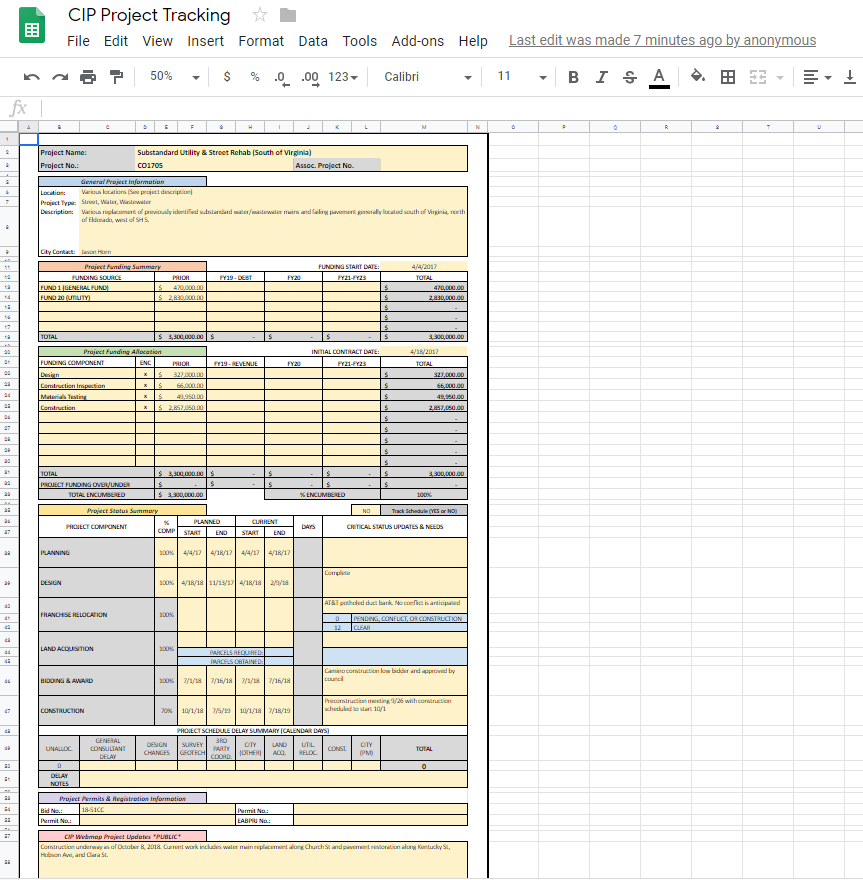

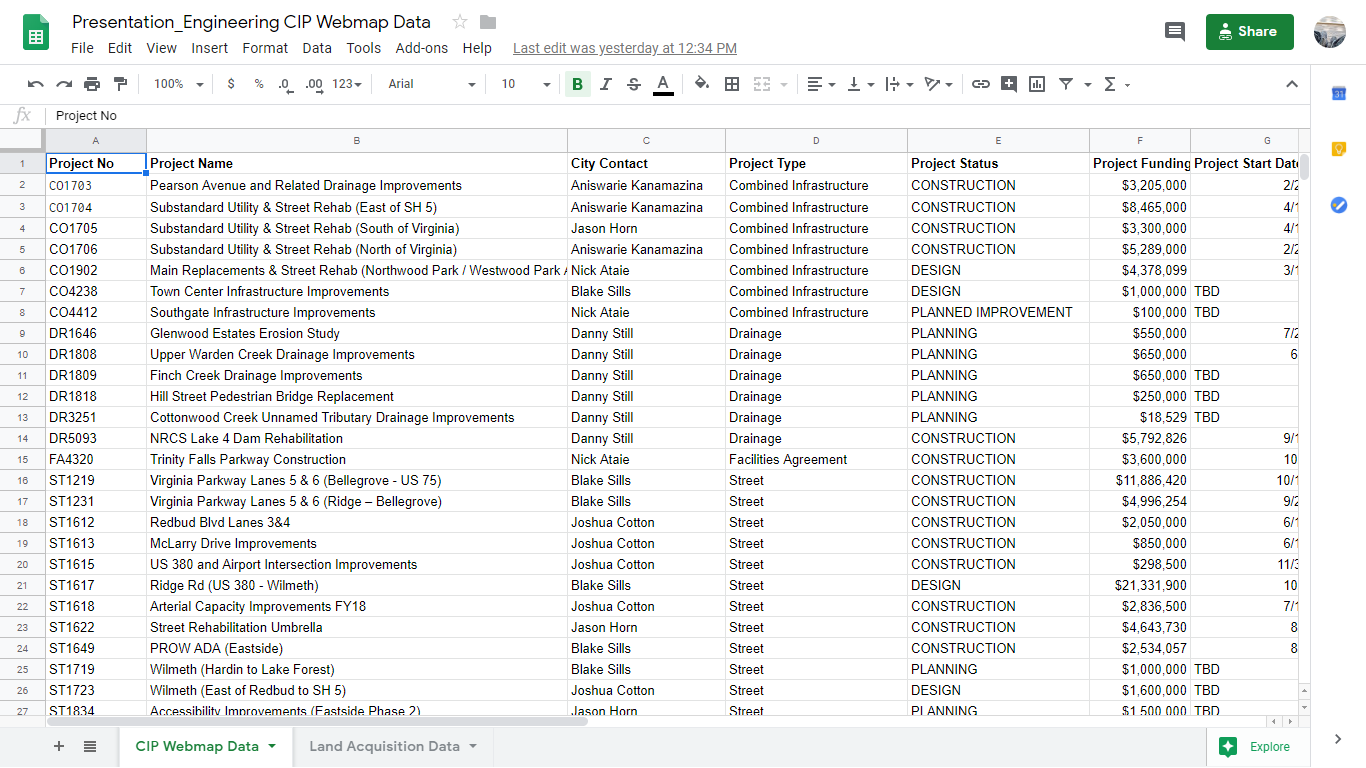

Normal Google URL: <i> https://docs.google.com/spreadsheets/d/1QB1pZQ3CN45ZYS2sc4LnuoOaImL5lQsP-ObWNQW5FjY/edit#gid=0 </i>

The magic is right at the end:

<center> /export?format=csv

It is now readable using Pandas!

We'll use the following command: `pd.read_csv()`

This can ingest a file location or URL

In [7]:
CIP_sheet = "https://docs.google.com/spreadsheets/d/1QB1pZQ3CN45ZYS2sc4LnuoOaImL5lQsP-ObWNQW5FjY/export?format=csv"
dataframe = pd.read_csv(CIP_sheet)
print(dataframe)

   Project No                                       Project Name  \
0      CO1703   Pearson Avenue and Related Drainage Improvements   
1      CO1704  Substandard Utility & Street Rehab (East of SH 5)   
2      CO1705  Substandard Utility & Street Rehab (South of V...   
3      CO1706  Substandard Utility & Street Rehab (North of V...   
4      CO1902  Main Replacements & Street Rehab (Northwood Pa...   
5      CO1909          Hill Street Pedestrian Bridge Replacement   
6      CO4238            Town Center Infrastructure Improvements   
7      CO4412              Southgate Infrastructure Improvements   
8      DR1646                     Glenwood Estates Erosion Study   
9      DR1808           Upper Warden Creek Drainage Improvements   
10     DR1809                  Finch Creek Drainage Improvements   
11     DR3251  Cottonwood Creek Unnamed Tributary Drainage Im...   
12     DR5093                     NRCS Lake 4 Dam Rehabilitation   
13     FA4320                 Trinity Falls Park

## Cleaning the Google Sheet

A Google Sheet is not a database.<br>
While some input standards can be enforced, <br> 
more often, they aren't.<br>  

- `Date` fields contain TBD entries<br>
- Funding column has \\$'s <br>
- Project Type needs to be all-caps

Pandas allows you to chain commands using the `.` notation

We'll use Pandas `astype()`, `replace()`, and `upper()` functions

In [8]:
df_dirty = dataframe.copy()
df_dirty = df_dirty[['Project Funding','Project Start Date', 'Estimated Project Completion Date','Project Type']]       
print(df_dirty)

   Project Funding Project Start Date Estimated Project Completion Date  \
0       $3,205,000          2/21/2017                         8/14/2019   
1       $8,465,000          4/17/2017                         7/10/2020   
2       $3,300,000          4/18/2017                         8/12/2019   
3       $5,289,000          2/21/2017                        10/14/2019   
4       $4,378,099          3/19/2019                        12/25/2020   
5         $350,000                TBD                               TBD   
6       $1,000,000           4/9/2019                          8/4/2021   
7         $100,000                TBD                               TBD   
8         $550,000          7/21/2017                               TBD   
9         $650,000           6/8/2018                               TBD   
10        $650,000                TBD                               TBD   
11         $18,529                TBD                               TBD   
12      $5,792,826       

In [9]:
df_clean = df_dirty.copy() 

df_clean['Project Funding'] = df_clean['Project Funding'].replace('[\$,]', '', regex=True).astype(float)
df_clean['Project Start Date'] = df_clean['Project Start Date'].replace('[TBD]', '', regex=True)
df_clean['Estimated Project Completion Date'] = df_clean['Estimated Project Completion Date'].replace('[TBD]', '', regex=True)
df_clean['Project Type'] = df_clean['Project Type'].astype(str).str.upper()
print(df_clean.dtypes)
print(df_clean)

Project Funding                      float64
Project Start Date                    object
Estimated Project Completion Date     object
Project Type                          object
dtype: object
    Project Funding Project Start Date Estimated Project Completion Date  \
0         3205000.0          2/21/2017                         8/14/2019   
1         8465000.0          4/17/2017                         7/10/2020   
2         3300000.0          4/18/2017                         8/12/2019   
3         5289000.0          2/21/2017                        10/14/2019   
4         4378099.0          3/19/2019                        12/25/2020   
5          350000.0                                                        
6         1000000.0           4/9/2019                          8/4/2021   
7          100000.0                                                        
8          550000.0          7/21/2017                                     
9          650000.0           6/8/2018        

The data are now clean and ready to be taken inside the ArcGIS Environment

Let's take a look at what we've done so far!

In [10]:
import pandas as pd
print("Pandas at {}".format(pd.__version__))
import numpy as np
print("Numpy at {}".format(np.version.full_version))
import arcpy
print("ArcPy imported successfully.")
import datetime, time
import os, shutil, tempfile
import traceback

def auto_truncate(val):
	return val[:255]

def write_to_log(content):
	log_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
	with open(r"C:\Users\jcarmona\Desktop\SCAUG 2019 PRESENTATION\CIP_GoogleSheet_log.txt", "a") as log_file:
		log_file.write(f"\n{log_time} --- {content}")

starttime = time.time()

Pandas at 0.23.4
Numpy at 1.15.1
ArcPy imported successfully.


In [11]:
CIP_sheet = "https://docs.google.com/spreadsheets/d/1QB1pZQ3CN45ZYS2sc4LnuoOaImL5lQsP-ObWNQW5FjY/export?format=csv"

print("Reading and cleaning CIP Google Sheet.")
df = pd.read_csv(CIP_sheet, converters ={'Project Description': auto_truncate, 'Project Notes': auto_truncate})

df['Project Funding'] = df['Project Funding'].replace('[\$,]', '', regex=True).astype(float)
df['Project Start Date'] = df['Project Start Date'].replace('[TBD]', '', regex=True).astype(str)
df['Estimated Project Completion Date'] = df['Estimated Project Completion Date'].replace('[TBD]', '', regex=True).astype(str)
df['Project Type'] = df['Project Type'].astype(str).str.upper()

print(df.head(5))

Reading and cleaning CIP Google Sheet.
  Project No                                       Project Name  \
0     CO1703   Pearson Avenue and Related Drainage Improvements   
1     CO1704  Substandard Utility & Street Rehab (East of SH 5)   
2     CO1705  Substandard Utility & Street Rehab (South of V...   
3     CO1706  Substandard Utility & Street Rehab (North of V...   
4     CO1902  Main Replacements & Street Rehab (Northwood Pa...   

           City Contact             Project Type Project Status  \
0  Aniswarie Kanamazina  COMBINED INFRASTRUCTURE   CONSTRUCTION   
1  Aniswarie Kanamazina  COMBINED INFRASTRUCTURE   CONSTRUCTION   
2            Jason Horn  COMBINED INFRASTRUCTURE   CONSTRUCTION   
3  Aniswarie Kanamazina  COMBINED INFRASTRUCTURE   CONSTRUCTION   
4            Nick Ataie  COMBINED INFRASTRUCTURE         DESIGN   

   Project Funding Project Start Date Estimated Project Completion Date  \
0        3205000.0          2/21/2017                         8/14/2019   
1    

# <center> Code Part II

## <center> Sheet to Table&nbsp;&nbsp;<i>2-Step</i>

#### <br>
#### <center> Converting Pandas Dataframe to NumPy Array
#### <center> Numpy Array to Esri Table
#### <center> Table Additions and Calculations

## Converting Pandas Dataframe to NumPy Array

Currently, there is not native support for Pandas dataframes within Desktop ArcGIS

We'll need to have an intermediate step using NumPy which is supported

Broadly, we will turn our records into a NumPy `array` using `np.array()` and `np.rec.fromrecords()`

This allows us to plug in our dataframe values with this chain command `dataframe.values`, using the following: 
`np.array(np.rec.fromrecords(dataframe.values))`

Then we'll gather our column names into a `list`, with this:  
`dataframe.dtypes.index.tolist()`

And assign the `list` of column names into the previous `array` as a `tuple`

This process takes 3 Lines of Code:

In [12]:
fromPandas_array = np.array(np.rec.fromrecords(df.values))
fromPandas_columns = df.dtypes.index.tolist()
fromPandas_array.dtype.names = tuple(fromPandas_columns)
print(f"These are our column names: \n{fromPandas_columns}")
print()
print(f"This is an array: \n{fromPandas_array}")

These are our column names: 
['Project No', 'Project Name', 'City Contact', 'Project Type', 'Project Status', 'Project Funding', 'Project Start Date', 'Estimated Project Completion Date', 'Project Description', 'Project Notes']

This is an array: 
[('CO1703', 'Pearson Avenue and Related Drainage Improvements', 'Aniswarie Kanamazina', 'COMBINED INFRASTRUCTURE', 'CONSTRUCTION', 3.205000e+06, '2/21/2017', '8/14/2019', 'Pavement rehabilitation of Pearson Avenue from Waddill Street to Kentucky Street including the addition of storm sewer infrastructure (Pearson, College, Coleman) and the replacement of a substandard wastewater main along Pearson from Waddill to Kentucky', 'Construction underway as of July 25, 2018. Current work includes installation of new underground storm drainage along Pearson Avenue.')
 ('CO1704', 'Substandard Utility & Street Rehab (East of SH 5)', 'Aniswarie Kanamazina', 'COMBINED INFRASTRUCTURE', 'CONSTRUCTION', 8.465000e+06, '4/17/2017', '7/10/2020', 'Various replac

## NumPy Array to Esri Table

With an `array` in hand, let's push it into a temporary table

We have two workspace options for this:
- Scratch GDB
- In-memory

In [13]:
disk_table = r"%scratchGDB%\CIP"
memory_table = r"in_memory\CIP"

Now we'll run an ArcPy tool from the Data Access module

`NumPyArrayToTable (in_array, out_table)`

This will accept our `fromPandas_array` as input, and will output to our table location

In [14]:
arcpy.da.NumPyArrayToTable(fromPandas_array, memory_table)
print("Transferred to memory")
arcpy.da.NumPyArrayToTable(fromPandas_array, disk_table)
print("Transferred to disk")

Transferred to memory


RuntimeError: table '%scratchGDB%\CIP' Exists

In [15]:
if arcpy.Exists(disk_table):
	print("Previous CIP Google Sheet Table found in Scratch. Deleting now.")
	arcpy.Delete_management(disk_table)
    
if arcpy.Exists(memory_table):
	print("Previous CIP Google Sheet Table found in Memory. Deleting now.")
	arcpy.Delete_management(memory_table)

Previous CIP Google Sheet Table found in Scratch. Deleting now.
Previous CIP Google Sheet Table found in Memory. Deleting now.


In [16]:
arcpy.da.NumPyArrayToTable(fromPandas_array, memory_table)
print("Transferred to memory")
arcpy.da.NumPyArrayToTable(fromPandas_array, disk_table)
print("Transferred to disk")

Transferred to memory
Transferred to disk


In [17]:
field_names = [f.name for f in arcpy.ListFields(memory_table)]
field_types = [f.type for f in arcpy.ListFields(disk_table)]
print(f"Here are some field names: \n{field_names} \n\nHere are some field types: \n{field_types}")

Here are some field names: 
['OBJECTID', 'Project_No', 'Project_Name', 'City_Contact', 'Project_Type', 'Project_Status', 'Project_Funding', 'Project_Start_Date', 'Estimated_Project_Completion_Date', 'Project_Description', 'Project_Notes'] 

Here are some field types: 
['OID', 'String', 'String', 'String', 'String', 'String', 'Double', 'String', 'String', 'String', 'String']


## Table Additions and Calculations

This next bit is something of a work-around

We'll need to convert our dates and also run a new general status rule

A quick call to:<br><br> `arcpy.AddField_management (in_table, field_name, field_type, ...)`

```python
arcpy.AddField_management(googletable, "StartDate", "DATE")
arcpy.AddField_management(googletable, "CompleteDate", "DATE")
arcpy.AddField_management(googletable, "GeneralStatus", "TEXT", field_length=50)
```

Next we'll call:<br><br> 
`arcpy.CalculateField_management (in_table, field, expression, {expression_type}, {code_block})`

```python
arcpy.CalculateField_management(in_table, "Field_Name",
                                "python_method(!Field_Name!)",
                                "PYTHON3", code_block)
```

The optional parameter `codeblock` requires some further explanation

This is our `date_codeblock`

```python
def skip_nulls(field):
    if field != '':
        return field
    else:
        return
```      

We'll need to wrap it in `"""` to feed it into the ArcPy parameter

```python
date_codeblock = """
def skip_nulls(field):
    if field != '':
        return field
    else:
        return"""
```      

This is our `status_codeblock`

```python
def general_status(field):
    if field in ["PLANNING", "PLANNED IMPROVEMENT"]:
        return "PLANNED IMPROVEMENT"
    elif field in ["DESIGN", "BIDDING", "LAND ACQUISITION", "FRANCHISE RELOCATION"]:
        return "DESIGN"
    elif field == "CONSTRUCTION":
        return "CONSTRUCTION"
    elif field == "COMPLETE":
        return "COMPLETE"
    else:
        return
```      

We've made more progress!

In [18]:
input_array = np.array(np.rec.fromrecords(df.values)) #create numpy array from pandas dataframe
col_names = df.dtypes.index.tolist() #grab column names from pandas dataframe as a list
input_array.dtype.names = tuple(col_names) #set column names in numpy array   

#googletable = r'%scratchGDB%\CIP_Google_Sheet_Table'
googletable = r'in_memory\CIP_Google_Sheet_Table'

#check needed if loop continues past 1st iteration, OR if using ScratchGDB
if arcpy.Exists(googletable):
	print("Previous CIP Google Sheet Table found. Deleting now.")
	arcpy.Delete_management(googletable)
arcpy.da.NumPyArrayToTable(input_array, googletable)
print("Converting CIP Google Sheet from CSV to Table in memory.")
print("Adding new fields to CIP Google Sheet Table.")

arcpy.AddField_management(googletable, "StartDate", "DATE")
arcpy.AddField_management(googletable, "CompleteDate", "DATE")
arcpy.AddField_management(googletable, "GeneralStatus", "TEXT", field_length=50)

Converting CIP Google Sheet from CSV to Table in memory.
Adding new fields to CIP Google Sheet Table.


<Result 'in_memory\\CIP_Google_Sheet_Table'>

In [19]:
print("Calculating new date fields in CIP Google Sheet Table.")
date_codeblock = """def skip_nulls(field):
	if field != '':
		return field
	else:
		return"""       
arcpy.CalculateField_management(googletable, "StartDate", "skip_nulls(!Project_Start_Date!)", 
                                "PYTHON3", date_codeblock)
arcpy.CalculateField_management(googletable, "CompleteDate", "skip_nulls(!Estimated_Project_Completion_Date!)", 
                                "PYTHON3", date_codeblock)

print("Calculating general status field in CIP Google Sheet Table.")
status_codeblock = """def general_status(field):
	if field in ["PLANNING", "PLANNED IMPROVEMENT"]:
		return "PLANNED IMPROVEMENT"
	elif field in ["DESIGN", "BIDDING", "LAND ACQUISITION", "FRANCHISE RELOCATION"]:
		return "DESIGN"
	elif field == "CONSTRUCTION":
		return "CONSTRUCTION"
	elif field == "COMPLETE":
		return "COMPLETE"
	else:
		return"""
arcpy.CalculateField_management(googletable, "GeneralStatus", "general_status(!Project_Status!)", 
                                "PYTHON3", status_codeblock)

Calculating new date fields in CIP Google Sheet Table.
Calculating general status field in CIP Google Sheet Table.


<Result 'in_memory\\CIP_Google_Sheet_Table'>

# <center> Code Part III

## <center> Managing Your&nbsp;&nbsp;<i>Chuck&nbsp;&nbsp;Wagon</i>

#### <br>
#### <center> Making SDE Connections
#### <center> Checking Versions
#### <center> New Item Maintenance

## Making SDE Connections

Let's make sure that we connect to our SDE

We'll create a fresh path each time using `tempfile.mkdtemp()` and assign it to a variable

In [20]:
sdeTempPath = tempfile.mkdtemp()

Now we'll call<br><br> 
`arcpy.CreateDatabaseConnection_management (out_folder_path, out_name, database_platform, instance, ...)`

In [21]:
arcpy.CreateDatabaseConnection_management(sdeTempPath, "Editor.sde",
                                          "SQL_SERVER", "ITT701",
                                          account_authentication = "OPERATING_SYSTEM_AUTH")

<Result 'C:\\Users\\jcarmona\\AppData\\Local\\Temp\\tmpdt90c0ts\\Editor.sde'>

In [22]:
EditSDE = os.path.join(sdeTempPath, "Editor.sde")
print(EditSDE)

C:\Users\jcarmona\AppData\Local\Temp\tmpdt90c0ts\Editor.sde


## Checking Versions

Let's assume we're being good and not editing the default instance

We'll need to do the following:
- check if our version exists
- make it if it doesn't

We'll iterate through the `arcpy.da.ListVersions()` function<br>
Adding each version name to `sdeVersionLIST`<br>
If we find our version, we'll check to make sure the description is filled out<br>

In [ ]:
#psst Jordan don't run this. It breaks. xoxo Jordan
sdeVersionLIST = []
for version in arcpy.da.ListVersions(EditSDE):
    sdeVersionName = version.name.split(".")[0]
    sdeVersionLIST.append(sdeVersionName)
    if sdeVersionName == '"MCKINNEY\\JCARMONA"':
        if version.description == "":
            print("No description found. Fixing.")
            arcpy.AlterVersion_management(EditSDE, '"MCKINNEY\JCARMONA".CARMONA', 
                                          description = "jcarmona@mckinneytexas.org | ext 7422")

Now we have a `list` of all the versions<br>
We'll use `not in` to find our missing version

In [ ]:
if '"MCKINNEY\\JCARMONA"' not in sdeVersionLIST:
    print("\tCARMONA version not found, creating now.")
    arcpy.CreateVersion_management(EditSDE,"sde.DEFAULT" ,"CARMONA", "PUBLIC")
    arcpy.AlterVersion_management(EditSDE, '"MCKINNEY\JCARMONA".CARMONA', 
                                  description = "jcarmona@mckinneytexas.org | ext 7422")
    print("Version created.")
else:
    print("\tCARMONA version exists, connecting now.")
    arcpy.CreateDatabaseConnection_management(sdeTempPath, "CARMONA.sde", "SQL_SERVER", 
                                              instance, "OPERATING_SYSTEM_AUTH", 
                                              version = '"MCKINNEY\JCARMONA".CARMONA')

## New Item Maintenance

Sometimes something new crops up

If our goal is a set it / forget it solution<br>
We need to add in a mechanism to alert us

We'll make a `list` to store our CIP project number codes from the Google Sheet<br><br>
A `cursor` will help us create a second `list` of CIP projects from our SDE<br><br>
Then we'll check them against each other to create a final `list` for inclusion in our alert

In [23]:
sde_CIP1923 = os.path.join(EditSDE, "SDE.DBO.DemoSection_CIP1923")
list_googleprojects = df['Project No'].tolist()
list_sde = []
list_email = []
print("Checking CIP Google Sheet Table for new projects.")
with arcpy.da.SearchCursor(sde_CIP1923, "CIPProjectNumber") as scursor:
	for srow in scursor:
		list_sde.append(srow[0])
for item in list_googleprojects:
	if item not in list_sde:
		list_email.append(item)
if list_email:
	print(f"\tThe following projects are new: {list_email}")
	write_to_log(f"The following projects are new: {list_email}")
else:
	print("\tNo new projects were found.")

Checking CIP Google Sheet Table for new projects.
	The following projects are new: ['CO1703', 'CO1909']


Although there is some overhead to working within the Esri SDE,

the benefits of a versioned environment are immense.

We're also informed if we need to do some manual labor!

In [24]:
print("Connecting to the SDE and appropriate version.")
sdeTempPath = tempfile.mkdtemp()
arcpy.CreateDatabaseConnection_management(sdeTempPath, "Editor.sde", "SQL_SERVER", 
                                          "ITT701", "OPERATING_SYSTEM_AUTH")
EditSDE = os.path.join(sdeTempPath, "Editor.sde")
sdeVersionNameFULL = ""
sdeVersionLIST = []
for version in arcpy.da.ListVersions(EditSDE):
	sdeVersionLIST.append(version.name)
	if version.name == "DBO.CarmonaVersion":
		if version.description == "":
			arcpy.AlterVersion_management(EditSDE, "CarmonaVersion", 
                                          description = "jcarmona@mckinneytexas.org | ext 7422")
if "DBO.CarmonaVersion" not in sdeVersionLIST:
	print("\tCarmona version not found, creating now.")
	arcpy.CreateVersion_management(EditSDE, "sde.DEFAULT" ,"CarmonaVersion", "PUBLIC")
	arcpy.AlterVersion_management(EditSDE, "CarmonaVersion", 
                                  description = "jcarmona@mckinneytexas.org | ext 7422")
	print("CarmonaVersion created.")
else:
	print("\tCarmonaVersion version exists, connecting now.")
	arcpy.CreateDatabaseConnection_management(sdeTempPath, "Carmona.sde", "SQL_SERVER", "ITT701",
                                              "OPERATING_SYSTEM_AUTH", version = "DBO.CarmonaVersion")

Connecting to the SDE and appropriate version.
	CarmonaVersion version exists, connecting now.


In [25]:
EditSDE_Carmona = os.path.join(sdeTempPath, "Carmona.sde")
sde_CIP1923 = os.path.join(EditSDE_Carmona, "SDE.DBO.DemoSection_CIP1923")
sde_CIPFY1923 = os.path.join(EditSDE_Carmona, "SDE.DBO.DemoSection_CIPFY1923")
sde_CIP1923_Point = os.path.join(EditSDE_Carmona, "SDE.DBO.DemoSection_CIP1923_Point")

list_googleprojects = df['Project No'].tolist()
list_sde = []
list_email = []
print("Checking CIP Google Sheet Table for new projects.")
with arcpy.da.SearchCursor(sde_CIP1923, "CIPProjectNumber") as scursor:
	for srow in scursor:
		list_sde.append(srow[0])
for item in list_googleprojects:
	if item not in list_sde:
		list_email.append(item)
if list_email:
	print(f"\tThe following projects are new: {list_email}")
	write_to_log(f"The following projects are new: {list_email}")
else:
	print("\tNo new projects were found.")

Checking CIP Google Sheet Table for new projects.
	The following projects are new: ['CO1703', 'CO1909']


# <center> Code Part IV

## <center>The Code<i>-ttle&nbsp;&nbsp;Drive</i>

#### <br>
#### <center> Tandem Cursors

## Tandem Cursors

Cursors can seem a little daunting.

They do require clear understanding<br>
In order to use them effectively

At their most basic, a `cursor` is comprised of:
- table or layer reference
- fields to be used
- query

There are individual cursors to:
- search records
- update records
- insert records

This script uses a search cursor to iterate through our new data from the Google Sheet and an update cursor to edit the old data in the SDE

In [26]:
updatefields_google = ["Project_No", "Project_Name"]
with arcpy.da.SearchCursor(googletable, updatefields_google) as scursor:
    for srow in scursor:
        print(f"My project number is: {srow[0]} --- {srow[1]})")

My project number is: CO1703 --- Pearson Avenue and Related Drainage Improvements)
My project number is: CO1704 --- Substandard Utility & Street Rehab (East of SH 5))
My project number is: CO1705 --- Substandard Utility & Street Rehab (South of Virginia))
My project number is: CO1706 --- Substandard Utility & Street Rehab (North of Virginia))
My project number is: CO1902 --- Main Replacements & Street Rehab (Northwood Park / Westwood Park Area))
My project number is: CO1909 --- Hill Street Pedestrian Bridge Replacement)
My project number is: CO4238 --- Town Center Infrastructure Improvements)
My project number is: CO4412 --- Southgate Infrastructure Improvements)
My project number is: DR1646 --- Glenwood Estates Erosion Study)
My project number is: DR1808 --- Upper Warden Creek Drainage Improvements)
My project number is: DR1809 --- Finch Creek Drainage Improvements)
My project number is: DR3251 --- Cottonwood Creek Unnamed Tributary Drainage Improvements)
My project number is: DR5093 

In [27]:
updatefields_google = ["Project_No", "Project_Name", "Project_Funding"] #fields in table
updatefields_sde = ["CIPProjectNumber", "ProjectName", "ProjectBudget"] #fields in SDE
arcpy.env.workspace = EditSDE_Carmona
edit = arcpy.da.Editor(EditSDE_Carmona)
edit.startEditing(True, True)

with arcpy.da.SearchCursor(googletable, updatefields_google) as scursor:
    for srow in scursor:
        print(f"Google project number is: {srow[0]} ---")
        update_query = f"CIPProjectNumber = '{srow[0]}'"
        ucursor = arcpy.da.UpdateCursor(sde_CIP1923, updatefields_sde, update_query)
        edit.startOperation()
        for urow in ucursor:
            print(f"\tSDE data for budget {urow[2]}")
            print(f"\tSDE data for project {urow[1]}")
        edit.stopOperation()
edit.stopEditing(True)

Google project number is: CO1703 ---
Google project number is: CO1704 ---
	SDE data for budget 8465000
	SDE data for project Substandard Utility & Street Rehab (East of SH 5)
Google project number is: CO1705 ---
	SDE data for budget 3300000
	SDE data for project Substandard Utility & Street Rehab (South of Virginia)
Google project number is: CO1706 ---
	SDE data for budget 5289000
	SDE data for project Substandard Utility & Street Rehab (North of Virginia)
Google project number is: CO1902 ---
	SDE data for budget 4378099
	SDE data for project Main Replacements & Street Rehab (Northwood Park / Westwood Park Area)
Google project number is: CO1909 ---
Google project number is: CO4238 ---
	SDE data for budget 1000000
	SDE data for project Town Center Infrastructure Improvements
Google project number is: CO4412 ---
	SDE data for budget 100000
	SDE data for project Southgate Infrastructure Improvements
Google project number is: DR1646 ---
	SDE data for budget 550000
	SDE data for project Gle

	SDE data for budget 3672697
	SDE data for project Oversize Participation Bloomdale (Stover Creek)
Google project number is: WW4239 ---
	SDE data for budget 1970000
	SDE data for project Oversize Participation Gravity Sewer Main from Lift Station H
Google project number is: WW4348 ---
	SDE data for budget 400000
	SDE data for project Aerial Wastewater Crossing Improvements
Google project number is: WW4350 ---
	SDE data for budget 0
	SDE data for project Substandard Mains (Wastewater)
Google project number is: WW4351 ---
	SDE data for budget 600000
	SDE data for project Sanitary Sewer Evaluation Survey (SSES)
Google project number is: WW4354 ---
	SDE data for budget 300000
	SDE data for project Undesignated Oversize Participation (Wastewater)
Google project number is: WW4404 ---
	SDE data for budget 557470
	SDE data for project Sanitary Sewer Condition Assessments


Within the actual script, this nested pattern has three update cursors in sequence

Allowing us to update three layers share similar records but differ in geometry type

In [1]:
counter =1
with arcpy.da.SearchCursor(googletable, updatefields_google) as scursor:
	for srow in scursor:
		update_query = f"CIPProjectNumber = '{srow[0]}'"
		print(f"\tCIP Project {srow[0]}, {counter-1} edits pending")
		ucursor = arcpy.da.UpdateCursor(sde_CIP1923, updatefields_sde, update_query)
		edit.startOperation()
		for urow in ucursor:
			urow[1] = srow[1]
			urow[2] = srow[2]
			urow[3] = srow[3]
			urow[4] = srow[4]
			urow[6] = srow[6]
			urow[7] = srow[7]
			if (
				urow[9] != srow[9] or
				urow[5] != srow[5]
			):
				urow[10] = datetime.date.today()
			urow[5] = srow[5]
			urow[9] = srow[9]
			ucursor.updateRow(urow)
			counter += 1
		edit.stopOperation()

NameError: name 'arcpy' is not defined

In [ ]:
counter = 1
with arcpy.da.SearchCursor(googletable, updatefields_google) as scursor:
	for srow in scursor:
		update_query = f"CIPProjectNumber = '{srow[0]}'"
		print(f"\tCIP Project {srow[0]}, {counter-1} edits pending")
		ucursor = arcpy.da.UpdateCursor(sde_CIPFY1923, updatefields_sde, update_query)
		edit.startOperation()
		for urow in ucursor:
			urow[1] = srow[1]
			urow[2] = srow[2]
			urow[3] = srow[3]
			urow[4] = srow[4]
			urow[6] = srow[6]
			urow[7] = srow[7]
			if (
				urow[9] != srow[9] or
				urow[5] != srow[5]
			):
				urow[10] = datetime.date.today()
			urow[5] = srow[5]
			urow[9] = srow[9]
			ucursor.updateRow(urow)
			counter += 1
		edit.stopOperation()

In [ ]:
counter = 1
with arcpy.da.SearchCursor(googletable, updatefields_google) as scursor:
	for srow in scursor:
		update_query = f"CIPProjectNumber = '{srow[0]}'"
		print(f"\tCIP Project {srow[0]}, {counter-1} edits pending")
		ucursor = arcpy.da.UpdateCursor(sde_CIP1923_Point, updatefields_sde, update_query)
		edit.startOperation()
		for urow in ucursor:
			urow[1] = srow[1]
			urow[2] = srow[2]
			urow[3] = srow[3]
			urow[4] = srow[4]
			urow[6] = srow[6]
			urow[7] = srow[7]
			if (
				urow[9] != srow[9] or
				urow[5] != srow[5]
			):
				urow[10] = datetime.date.today()
			urow[5] = srow[5]
			urow[9] = srow[9]
			ucursor.updateRow(urow)
			counter += 1
		edit.stopOperation()

print("Editing loops complete for CIP layers.")
print(f"Editing environment active: {edit.isEditing}")
edit.stopEditing(True)
print("Edits saved.")
print(f"Editing environment active: {edit.isEditing}")
arcpy.ReconcileVersions_management(EditSDE, "ALL_VERSIONS", "sde.DEFAULT", r'CarmonaVersion', "LOCK_ACQUIRED", 
                                   "NO_ABORT", "BY_OBJECT", "FAVOR_TARGET_VERSION", "POST", "KEEP_VERSION", None, "PROCEED")
print("Version has reconciled and posted to Default.")

In [ ]:
print("Editing loops complete for CIP layers.")
print(f"Editing environment active: {edit.isEditing}")
edit.stopEditing(True)
print("Edits saved.")
print(f"Editing environment active: {edit.isEditing}")
arcpy.ReconcileVersions_management(EditSDE, "ALL_VERSIONS", "sde.DEFAULT", r'CarmonaVersion', "LOCK_ACQUIRED", 
                                   "NO_ABORT", "BY_OBJECT", "FAVOR_TARGET_VERSION", "POST", "KEEP_VERSION", None, "PROCEED")
print("Version has reconciled and posted to Default.")

# <center> <h1 style="font-family:Brush Script MT, Brush Script Std, cursive">Fin

## <center>Jordan Carmona, GISP

#### <br>
#### <center> jcarmona@mckinneytexas.org
#### <center> linkedin/in/jordancarmona